# Homework 1: Getting Started with Probability 
 Pratham Mehta (cbm4kx)
 
 CS 3501: Foundations of Data Analysis

## Question 1

The UVA men’s and women’s basketball teams are both playing Virginia Tech on the same
day. There is a 60% chance that the UVA men win and a 60% chance that the UVA women
win. In addition, there is a 75% chance that UVA wins at least one of the games (that is,
they win the men’s game, or the women’s game, or both). Let M denote the event that the
UVA men win, and let W denote the event that the UVA women win.



a) What does $P(M \cup W)$  mean in English? What is its value?

> $P(M \cup W)$ represents the probability that either the UVA mens team or the UVA women team win their games. 
>
> $ P(M \cup W) = P(M) + P(W) - P(M \cap W) = 0.75$


 
b) What is the probability that UVA wins both games?

> $ P(M \cup W) = 0.75 $


c) What does $P(M \mid W)$  mean in English? What is its value?

> $P(M \mid W)$ represents the probability that the men's team wins, given that the women's team wins. We calculate it with the following: 
> 
> $P(M \mid W) = \frac{P(M \cap W)}{P(W)} = \frac{0.45}{0.6} = 0.75$

d) What is the probability that UVA wins **exactly** one game (men or women, but not both)?

> $P(M \cup W) - P(M \cap W) = 0.75 - 0.45 = 0.3$


e) If the UVA women lose, what is the probability that the UVA men also lose? 


> $P(\neg M \mid \neg W) = \frac{P(\neg M \cap \neg W)}{P(\neg W)} = \frac{0.15}{0.4} = 0.375$



## Question 2

You have two black socks, two white socks, two red socks, and two blue socks in your sock
drawer. If you pick two socks out at random (without looking!), what is the probability that
they match? Explain how you arrived at the answer, don’t just give a number!

> Getting matching socks randomly would mean we draw two socks of the same color consecutively. 
>
> For example, $P(S_1 = black)$ is the probability that the first sock is black. 
>   
>
> $ P(S_2 = black \mid S_1 = black)  +  P(S_2 = white \mid
 S_1 = white)  +  P(S_2 = red \mid
  S_1 = red)  + P(S_2 = blue \mid
   S_1 = blue)  = \\ $
> $ (\frac{2}{8})(\frac{1}{7}) * 4 = \frac{1}{7} $




## Question 3

According to the American Lung Association, there is a 0.13% chance to develop lung cancer.
Of the people who have lung cancer, 90% of them are smokers. In the population of people
who do not have lung cancer, 16.9% are smokers.


(a) What percentage of the total population are smokers?

> $P(S) = P(LC \cup S) + P(\neg LC \cup S) = 0.0017 + 0.1687 = 0.1704 $



(b) If you are a smoker, what is your probability to develop lung cancer?

> $ P(LC \mid S) = \frac{P(LC \cap S)} {P(\neg LC \cap S) + P(LC \cap S)} = \frac{0.0017} {0.0017 + 0.1687} = 0.0099765258216 $


(c) If you are not a smoker, what is your probability to develop lung cancer?

> $ P(LC \mid \neg S) = \frac {P(LC \cap  \neg S)} {P(LC \cap \neg S) + P(\neg LC \cap \neg S)} = \frac {0.00013}{0.00013 + 0.8299} = 0.00015661 $




## Question 4

Plot the data as a 2D scatterplot (right and left hippocampal volume as the two axes).
Use two different colors for the two classes (healthy/dementia). Do you think there is
separation between the two classes?

In [7]:
# Import libraries and read in data
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('OASIS-hippocampus.csv')
dementia_df = df[df['Dementia'] == 1]
healthy_df = df[df['Dementia'] == 0]
print(dementia_df.head())
print(healthy_df.head())

    Unnamed: 0             ID M.F Hand  Age  Educ  SES  MMSE  CDR  eTIV  \
1            2  OAS1_0003_MR1   F    R   73     4  3.0    27  0.5  1454   
5           12  OAS1_0015_MR1   M    R   76     2  NaN    28  0.5  1738   
6           13  OAS1_0016_MR1   M    R   82     2  4.0    27  0.5  1477   
10          18  OAS1_0021_MR1   F    R   80     3  3.0    23  0.5  1794   
11          19  OAS1_0022_MR1   F    R   69     2  4.0    23  0.5  1447   

     nWBV    ASF  Delay  RightHippoVol  LeftHippoVol  TrainData  Dementia  
1   0.708  1.207    NaN           2896          2801          1         1  
5   0.719  1.010    NaN           3052          2770          1         1  
6   0.739  1.188    NaN           3421          3119          0         1  
10  0.765  0.978    NaN           3715          3019          0         1  
11  0.757  1.213    NaN           3258          3566          0         1  
   Unnamed: 0             ID M.F Hand  Age  Educ  SES  MMSE  CDR  eTIV   nWBV  \
0           

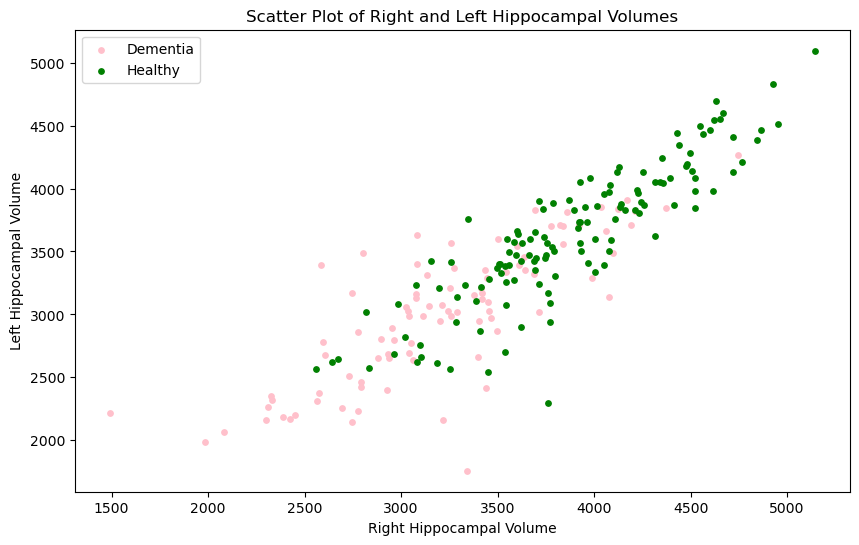

In [12]:
plt.figure(figsize=(10, 6))
plt.title('Scatter Plot of Right and Left Hippocampal Volumes')
plt.xlabel('Right Hippocampal Volume')
plt.ylabel('Left Hippocampal Volume')
plt.scatter(dementia_df["RightHippoVol"], dementia_df["LeftHippoVol"], color = "pink", label = "Dementia", s = 15)
plt.scatter(healthy_df["RightHippoVol"], healthy_df["LeftHippoVol"], color = "green", label = "Healthy", s = 15)
plt.legend()
plt.show() 

We want to plot the right hippocampal volume and the left hippocampal volume in a scatter plot. Healthy patients will be represented with green dots, and patients with dimentia will be represented with red dots.